In [3]:
from eyeball.predictor import Predictor
from PIL import Image

In [9]:
!rm /home/dev/.cache/gdown/https-COLON--SLASH--SLASH-github.com-SLASH-ndgnuh-SLASH-eyeball-SLASH-releases-SLASH-download-SLASH-weights-SLASH-db_shufflenet_v2-best.pt

In [10]:
predictor = Predictor.from_config("./configs/db_shufflenet_v2.yml")

Cached Downloading: /home/dev/.cache/gdown/https-COLON--SLASH--SLASH-github.com-SLASH-ndgnuh-SLASH-eyeball-SLASH-releases-SLASH-download-SLASH-weights-SLASH-db_shufflenet_v2-best.pt
Downloading...
From: https://github.com/ndgnuh/eyeball/releases/download/weights/db_shufflenet_v2-best.pt
To: /home/dev/.cache/gdown/tmpb5qpytqr/dl
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16.2M/16.2M [00:02<00:00, 6.03MB/s]


In [11]:
image = Image.open("pdf-data/train/239009dc-117b-5f2-000000008.jpg")
# image = Image.open("funsd/test/0000.jpg")
image = Image.open("testimg.jpg").convert("RGB")


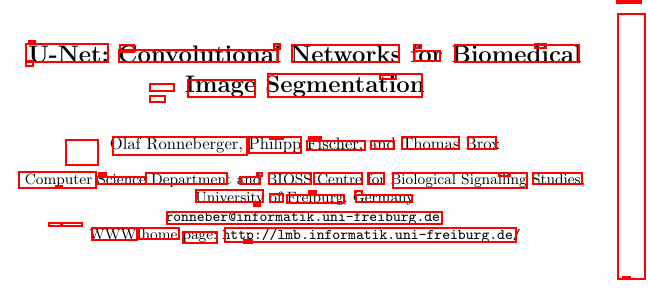

In [12]:
result = predictor.predict_single(image)
predictor.visualize_result(image, result)